# Lio and Annika's (original) code

In [0]:
import random
import uuid

#First we create a class for the monomers
class monomer:
  #Monomers have 3 attributes: handedness, and two potential bonds
  #This method initializes a monomer with its handedness passed in
  def __init__(self,name = "monomer"):
    self.handedness= self.assignhandedness()
    self.active = None
    self.passive = None
    self.name=name
    self.key = uuid.uuid1()
  #returns 0 or 1
  def assignhandedness(self):
  i=random.randint(1,10)
  if i%2==0:
    return "l"
  return "r"

  def __repr__(self):
      return self.name + ", " + self.handedness
    
    
  #says if a monomer or a polymer
  def monomerorpolymer(self):
      if self.checksingle() == True:
          print( "A", self.handedness, "monomer")
      else:
          print ("A " + self.handedness + " monomer in a polymer")
  #deletes monomer: when called it raises NameError     
  def delete(self):
      if self.checksingle():
          print( "monomer was deleted.")
          del self
      else: 
          print("monomer is polymer, can not be deleted")
  #checks if it is single
  def checksingle(self):
      return self.active == None and self.passive == None
    

#checks if passive end is open
    def passiveopen(self):
        return self.passive == None
#checks if active end is open
    def activeopen(self):
        return self.active == None
          
#checks if active end is open and then finds a partner and bonds
    def selectpartner(self,some_monomers):
        if (self.activeopen()):
            candidate = None
            for attempt in range(500): #only runs 500 times before giving up
                candidate = random.choice(some_monomers)
                if candidate.passiveopen():
                    self.bond(candidate)
                return None
        else :
            print("active end is not open cannot bond")

    def bond(self, other):
        self.active = other
        other.passive = self
#breaks bond
    def breakbond(self):
        if self.active==None:
            return
        (self.active).passive = None
        self.active = None

    def do_nothing(self):
        print("I'm doing nothing")
        return None
 #determining homochirality in active bond
    def activehomochiralbond(self):
        if self.active==None:
            return False
        return self.active.handedness==self.handedness
#determine homochirality in passive bond
    def passivehomochiralbond(self):
        if self.passive==None:
            return False
        return self.passive.handedness==self.handedness
#returns number of consectuive homochiral bonds on active end
    def activeside(self):
        n=0
        bond=self
        while (bond.activehomochiralbond()):
            n=n+1
            bond=bond.active
        print("there are " + str(n) +" homochiral bonds to "+self.name +"'s active side")
        return n
#return number of consecutive homochiral bonds on passive end
    def passiveside(self):
        n=0
        bond=self
        while (bond.passivehomochiralbond()):
            n=n+1
            bond=bond.passive
        print("there are " + str(n) +" homochiral bonds to " +self.name+"'s passive side")
        return n
    def polymerarray(self):
       array=[]
       array.append(self.name+" "+self.handedness)
       monomer=self
       while(monomer.passive!=None):
           array.insert(0,monomer.passive.name+" "+monomer.passive.handedness)
       monomer=self
       while(monomer.active!=None):
           array.append(monomer.active.name+" "+monomer.active.handedness)
           monomer=monomer.active
       print (array)
          
      
class world:
    def __init__(self, size):
        self.pool = {}
        for n in range(size):
            new = monomer()
            self.pool.update({new.key : new})
        self.open = self.pool
        self.polymers = {}

        
        
#The basic function for a time step, done over all the monomers
#This function needs rewriting since the dictionary update
    # def iteratefull(self):
    #     #randomize the monomers
    #     random.shuffle(self.pool)
    #     #ask each what it wants to do
    #     for monomer in self.pool:
    #         iterate(monomer)
    #     #Do bookkeeping
         
#We need some polymer accounting methods
#We need a method to add a new polymer to the polymer pool
    def newpolymer(self, monomer1, monomer2):
        newkey = uuid.uuid1()
        newpolymer = [monomer1, monomer2]
        self.polymers.update({newkey : newpolymer})
        
#A method to take one polymer and turn it into two polymers at a breakpoint
    def breakpolymer(monomer_to_break):
        #Find the monomer's polymer
        #Find the monomer's position in the polymer
        #Separate the polymer into two smaller polymers
        #Check if either of the two new polymers has length 1
            #Remove a length 1 polymer from the polymer dict
        
#A method to add a monomer to a polymer
    def activeappend(monomer, polymer):
        #do a thing
        
        
        
        
        
        
#decides and acts for a single monomer
    def iterate(self, monomer):
        if monomer.active == None:
            choice = random.randint(0,2)
            if choice == 0:
                #bond
                #Pick a partner and bond
                #Remove partner from open pool
                #Check if ... ran out of time.
                
                
                
                monomer.selectpartner(self.open)
                
                self.open.pop((monomer.active).key)
                #Update the polymer accounts
            elif choice == 1:
                #select poof
                self.pool.pop(monomer.key)
                self.open.pop(monomer.key)
                del monomer
            else:
                monomer.do_nothing()
        else:
            choice = random.randint(0,1)
            if choice == 0:
                #select break bond
                #This will requre updating the polymer accounts
                monomer.breakbond()
            else:
                #select do nothing
                monomer.do_nothing()
    
    #Selects a random monomer and acts in it
    def iteraterand(self):
        monomer = random.choice(self.pool)
        self.iterate(monomer)


#We should restructure this whole thing using dictionaries instead of lists
#I'm thinking polymers are stored in a dictionary of lists.

IndentationError: ignored

# Victor's Brilliant Tutorial

## Class definitions

### The **Rat** class
In this world, there are cities and rats. Every City can contain many Rats, into an array called, unsurprisingly ```_rats```.

These rats can then be accessed from the city, and they keep their individual identities, so we can ask them for their properties, as long as the rats make those properties available to the outside world. Since the rats themselves know which City they live in, we can also ask a rat for its city's properties, as long as the City makes those available.

Now, please note that Python actually makes _everything_ inside an object available from the outside. That's very bad practice in general, but Python thinks it's the programmers' decision whether they want to write horrible dangerous code. To stick to good old OOP practices, we will not be altering the values of objects directly here. Please use the setter and getter methods instead.

In [0]:
class Rat:
  """A lovely fluffy misunderstood creature"""
  def __init__(self, **kwargs):
    # Set these values if they were provided when instantiating the object, otherwise assign defaults
    self._id = kwargs['id'] if 'id' in kwargs else id(self)
    self._name = kwargs['name'] if 'name' in kwargs else "Sultan"
    self._tail_length = kwargs['tail_length'] if 'tail_length' in kwargs else 12
    if 'city' in kwargs:
      self._city = kwargs['city']
    else:
      raise AttributeError("You can't render a Rat stateless!\nIt's in the Universal Declaration of Rodent Rights!\nGive this poor Rat a City  >=(") # 
      
    # upon creation of this rat, tell its city to accept it:
    self._city.add_rat(self)
  # end def: __init__ (i.e. the constructor method)

  def __str__(self):
    return f"<<<>>>\n\tI am a happy {type(self).__name__} called {self.get_name()}.\n\tMy tail is {self.get_tail_length()} cm long and I live in {self.get_city_name()}.\n<<<>>>"
  
  #########################
  # GETTER/SETTER METHODS #
  #########################
  def get_id(self):
    return self._id
  
  def get_name(self):
    return self._name
  
  def get_city_name(self):
    return self._city.get_name()

  def get_tail_length(self):
    return self._tail_length

  def set_tail_length(self, new_length):
    if new_length < self._tail_length:
      print("Oh no! My tail has been cut! =,(")
    elif new_length > self.get_tail_length():
      print(f"\nI am getting good food in {self.get_city_name()}, my tail is getting longer! :-D")
      print(f"It used to be {self._tail_length} cm long, and now it has grown to {new_length}!\n")
    else:
      print("I like my tail. I think I'll keep it just like it is!")
    self._tail_length = new_length
# end class: Rat

### The **City** class

In [0]:
class City:
  """A great place to live if you're a Rat. Full of wonder and opportunity!"""
  def __init__(self, **kwargs):
    self._id = kwargs['id'] if 'id' in kwargs else id(self)
    self._name = kwargs['name'] if 'name' in kwargs else "Chicago"
    self._rats = kwargs['rats'] if 'rats' in kwargs else []
  # end def: __init__ (i.e. the constructor method)

  #########################
  # GETTER/SETTER METHODS #
  #########################
  def get_name(self):
    return self._name

  def get_rats(self):
    return self._rats
  
  ####################################
  # OTHER METHODS OF THE City CLASS #
  ####################################
  def add_rat(self, rat):
    self._rats.append(rat)
# end class: City

## The program
Here we have code that creates an object of class _City_, then it creates a _Rat_ object which belongs to the city, and then accesses the properties of the rats within the city.

In [0]:
nyc = City(name="New York City, baby!")
squeeky = Rat(city=nyc, name="Squeeky the Rodent of Unusual Size")

# OK, let's test the rat object:
print(squeeky)
squeeky.set_tail_length(22)

<<<>>>
	I am a happy Rat called Squeeky the Rodent of Unusual Size.
	My tail is 12 cm long and I live in New York City, baby!.
<<<>>>

I am getting good food in New York City, baby!, my tail is getting longer! :-D
It used to be 12 cm long, and now it has grown to 22!



So far so good. But here's the cool thing: because of how we built our classes, now each **City** is a container of **Rat**s.

In [0]:
print(nyc.get_rats()) # This will just print the list of objects in the rats list
print(nyc.get_rats()[0]) # And this will print the first of them, using its internal print method
print(nyc.get_rats()[0].get_name()) # Neat, aye?!

<<<>>>
	I am a happy Rat called Squeeky the Rodent of Unusual Size.
	My tail is 22 cm long and I live in New York City, baby!.
<<<>>>
Squeeky the Rodent of Unusual Size


Let's make a deliberate mistake by not giving this poor Rat its well-deserved City:

In [0]:
diggy = Rat(name="Diggy the Digging Rat")

AttributeError: ignored

In [0]:
diggy = Rat(name="Diggy the Digging Rat", city=nyc)

In [0]:
for rat in nyc.get_rats():
  print(rat.get_name())

## Removing elements from the container class
We can remove Rats from the City without having to specify any ID, **Python keeps track of every object's uniqueness automatically**!
Here's a **very ugly** way to get this done:

In [0]:
nyc._rats.remove(diggy)
nyc.get_rats()

Now there's only one rat (Squeeky). Diggy still exists, but he's floating in limbo, he no longer belongs to any City and is thus a stateless Rat.

This violates the Universal Convention of Rodent Rights, and it's a main reason **messing with the internal attributes of an object is a horrendous programming practice**.

Worse still, Diggy himself doesn't even know that he doesn't live in New York anymore:

In [0]:
diggy.get_city_name()

So, all in all, going inside an object and changing its attributes is very very bad programming, please don't do it.

Instead, we should have added a function to remove rats into the City class. This function should check why we are removing the Rat. If the rat died, all right, then it should go and destroy the Rat object - by calling a destructor method defined within the Rat class itself (we could call it ```die(self)```, for example). However, if the Rat is still alive, the function should reject the request and raise an exception informing the user that Rats cannot be rendered stateless.

### Take-home messages
1. You can remove objects from storage in lists within other objects.
1. It's best to do that from within the container object, using a removal method that deals with all cases appropriately. Do not just go in and mingle with the innards of an object, it's bad programming.

# Mafe, Reuben and Victor's spaghetti code

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 18 22:10:22 2020

@author: Mafe
"""

from random import shuffle, uniform, randint
from collections import defaultdict

# CONSTANTS
N_MONOMERS_EQ = 70   # number of monomers at equilibrium
CHIRAL_SKEW_LR = 0.5   # chirality probability
N_STEPS = 6   # number of steps

# VARIABLES
chiral_bias = CHIRAL_SKEW_LR
n_mono_L = int(N_MONOMERS_EQ * chiral_bias * 0.8)   # left monomers  #REMOVE MULTIPLIERS
n_mono_R = int((N_MONOMERS_EQ - n_mono_L) * 0.7)   # right monomers  #REMOVE MULTIPLIERS
n_monos = n_mono_L + n_mono_R   # total number of monomers

# MONOMER ACTIONS
P_MONO_REACT = 0.4   # monomer reaction probabilty
P_MONO_DECOM = 0.0   # monomer decomposition probabilty
P_MONO_NTHNG = 1.0 - (P_MONO_REACT + P_MONO_DECOM)   # monomer doing nothing probabilty

# POLYMER ACTIONS
P_POLY_REACT = 0.6   # polymer reaction probabilty
P_POLY_NTHNG = 0.0   # polymer doing nothing probabilty
P_POLY_BREAK = 1.0 - (P_POLY_REACT + P_POLY_NTHNG)   # polymer breaking probabilty

# BOND BREAKING PROBABILITIES
BOND_BREAK_BASE_PROB = 0.2   # base bond breaking probability
BOND_BREAK_HOMO_SELF = 0.90   # bond breaking probability if bond is between two homochiral monomers
BOND_BREAK_HOMO_NEIGHBOUR_IMP = 0.3   # how much the bond improves by having a homochiral neighbour

# LISTS
monomers = []
mono_L = []
mono_R = []

all_react = []   # monomers + polymers


# add monomers to lists
mono_L.append(n_mono_L)
mono_R.append(n_mono_R)
monomers.append(n_monos)


def add_monomers ():
    # randomly add left or right monomers if the existing number is less than the number of monomers in equilibrium
    global n_monos, n_mono_L, n_mono_R
    
    while n_monos < N_MONOMERS_EQ:
        rnd = uniform(0,1)
        
        if rnd < CHIRAL_SKEW_LR:
            n_mono_L += 1
        else:
            n_mono_R += 1
            
        n_monos = n_mono_L + n_mono_R
        
    #return n_monos
# End def add_monomers()


def remove_monomers ():
    # randomly remove left or right monomers if the existing number
    # is greater than the number of monomers in equilibrium
    global n_monos, n_mono_L, n_mono_R
    
    while n_monos > N_MONOMERS_EQ:
        rnd = randint(0, n_monos)

        if rnd < n_mono_L:
            n_mono_L -= 1
        else:
            n_mono_R -= 1
        
        n_monos = n_mono_L + n_mono_R
        
    #return n_monos
# End def remove_monomers()


def get_mono_proportions(n_mon):
    n_react = round(n_mon * P_MONO_REACT)   # number of monomers that will chose to react
    n_decom = round(n_mon * P_MONO_DECOM)   # number of monomers that will chose to decompose
    n_nthng = n_mon - (n_react + n_decom)   # number of monomers that will chose to do nothing

    return n_react, n_decom, n_nthng
# End def get_mono_proportions()


def get_poly_proportions(poly_list):
    
    # to get which polymers either react, break, or do nothing, we will compare a random
    # probability to polymer action probabilities. Then, the polymers will be added to
    # lists depending on the result of the comparison 
    
    poly_react = [] # polymers that react
    poly_break = [] # polymers that break
    poly_nthng = [] # polymers that do nothing
    
    for poly in poly_list:
        rnd = uniform(0,1)
        # if random prob is less than prob of reaction, send to list of polymers that react,
        # if random prob is greater than prob of reaction and less than prob of reaction and breaking,
        # break the polymer 
        if rnd < P_POLY_REACT:
            poly_react.append(poly)
        elif rnd >= P_POLY_REACT and rnd < P_POLY_REACT + P_POLY_BREAK:
            poly_break.append(poly)
            #print('##', poly, '##')
        else:
            poly_nthng.append(poly)
    
    return poly_react, poly_break, poly_nthng
# End def get_poly_proportions()


def reaction(reactant_list):
    
    # all monomers and polymers that chose to react will for a new polymer
    # two elements (monomers or polymers) that decided to react will form a polymer and be sent
    # to a next round polymer list. If the remainder of the reactant list is 1, it will be sent to
    # the next round list of monomers or polymers
    
    shuffle(reactant_list)
    for i in range (0, len(reactant_list)//2):
        a = reactant_list.pop()
        b = reactant_list.pop()
        next_round_polys.append(a + b)
    # if there is a remainder in the list, then check if it is a monomer or a polymer and
    # append to next round list
    if len(reactant_list):
        lonely_reactant = reactant_list.pop()
        if len(lonely_reactant) == 1:
            next_round_monos.append(lonely_reactant)
        else:
            next_round_polys.append(lonely_reactant)
# End def reaction()     


def break_bonds(poly_break_list):
    all_poly_break_probs = {}

    # to look at how homochiral each bond of a polymer is, we look right and left of the each bonds.
    # we calculate the bond breaking probability by multiplying a bond breaking base probability by
    # a probability if the monomers on both sides of the bond are homochiral, in addition to a
    # probability given if the left and right neighbours are homochiral.
    # the breaking probability is appended to 

    for poly_idx, poly_seq in enumerate(poly_break_list):
        all_poly_break_probs[poly_idx] = [poly_seq]
        for j in range(len(poly_seq) - 1):
            #print(poly_seq[j], poly_seq[j + 1])
            #bond_idx = str(poly_idx + 1) + '.' + str(j + 1)
            this_mono = poly_seq[j]
            next_mono = poly_seq[j + 1]
            #bonds[bond_idx] = {'seq': this_mono + next_mono}
            
            # CALCULATE PROBABILITIES
            prob_brk = BOND_BREAK_BASE_PROB
            # is the bond homochiral?
            if this_mono == next_mono:
                prob_brk *= BOND_BREAK_HOMO_SELF  
                # look left
                k = j - 1
                while k >= 0 and poly_seq[k] == this_mono:
                    prob_brk *= 1 - ((BOND_BREAK_HOMO_NEIGHBOUR_IMP**(abs(j-k))))
                    k -= 1
                # look right
                k = j + 2
                while k < len(poly_seq) and poly_seq[k] == this_mono:
                    prob_brk *= 1 - ((BOND_BREAK_HOMO_NEIGHBOUR_IMP**(abs(k-j-1))) )
                    k += 1
            all_poly_break_probs[poly_idx].append(prob_brk)
        # end for: checking sequence monomer by monomer
    # end for: going over every polymer to calculate breaking probability  
    
    for poly_idx in all_poly_break_probs:
        poly_break_probs = all_poly_break_probs[poly_idx]
        poly_seq = poly_break_probs.pop(0)
        #return
        print(poly_seq)
        print(poly_break_probs)
        
        bond_idx_list = list(range(len(poly_break_probs)))
        shuffle(bond_idx_list)
        print(bond_idx_list)

    
        for bond_idx in bond_idx_list:
            rnd_prob = uniform(0,1)
            
            # check if a random number is less than breaking prob
            # if it is, split polymer at bond_idx
            # send two resulting polys into new_polys
            # break out of this for loop bc we dont want to break polymers more than once
            # if it didnt break at all, send the whole thing to new_polys
                
            if rnd_prob < poly_break_probs[bond_idx]:
                
                # we want to break the polymer at this bond
                print("we want to break polymer {} at bond {}".format(poly_seq, bond_idx))
                poly_seq_head = poly_seq[:(bond_idx + 1)]
                poly_seq_tail = poly_seq[(bond_idx + 1):]
                print(poly_seq_head, poly_seq_tail)
            
                if len(poly_seq_head) == 1: #and (poly_seq_head == True or poly_seq_head == 'R'):
                    #print("I'm a {} monomer".format(poly_seq_head))
                    monomers.append(poly_seq_head)
                else:
                    #print("I'm not a monomer")
                    next_round_polys.append(poly_seq_head)
                    
                if len(poly_seq_tail) == 1: #and (poly_seq_tail == True or poly_seq_tail == 'R'):
                    #print("I'm a {} monomer".format(poly_seq_tail))
                    monomers.append(poly_seq_head)
                else:
                    #print("I'm not a monomer")
                    next_round_polys.append(poly_seq_tail)
                    
                # we want to destroy old polymer
                poly_seq = ''
                
                # break out of the for loop bc we dont want to break a polymer more than once
                break
            # end if: polymer does break at bond idx
        # end for: checking every bond breaking probability
        print(poly_seq) 
        # if polymer didnt break and its length is greater than one append to next_round_polys list
        if len(poly_seq) > 1:
            #print("I'm not breaking")
            next_round_polys.append(poly_seq)

        print()
    # end for: removing the polymer sequences from dictionary of probabilities
# end def breaking_bonds_prob



next_round_polys = []
next_round_monos = []
monomers = []
for i in range(N_STEPS):
    this_round_polys = next_round_polys.copy()
    this_round_monos = next_round_monos.copy()
    add_monomers()
    remove_monomers()
    n_mono_L_react, n_mono_L_decom, n_mono_L_nthng = get_mono_proportions(n_mono_L)
    n_mono_R_react, n_mono_R_decom, n_mono_R_nthng = get_mono_proportions(n_mono_R)
    all_react = []
    all_react.extend([True] * n_mono_L_react)
    all_react.extend(['R'] * n_mono_R_react)
    
    poly_react, poly_break, poly_nthng = get_poly_proportions(this_round_polys)
    
    all_react.extend(poly_react)
    
    
    # clear the polymer and monomer lists
    next_round_polys = []
    next_round_monos = []
    
    # add polymers and monomers that didnt do anything to the next_round respective lists
    
    reaction(all_react)
    break_bonds(poly_break)
    
    # counting()
    

#print(break_probs)

# Chemical soup code 2.0

Hello and welcome to *Do Opposites Attract?*, the first monomer dating show. We're here to see if similarity between member(s) of a relationship matters in the strength of the bond between the individuals. Read on as we introduce you to our monomers, our polymers, and the stylish bag that they reside in. Along the way we will keep you up to date on all the drama of falling in love and breaking hearts. 

## Global Parameters

Here's where we keep the rules by which our contestants must play.

In [0]:
#the bond break probbility applied to all bonds
BASE_BOND_BREAK_PROBABILITY = 0.2
#if a bond itself is homochiral the base bond fator is multiplied by
#this factor
HOMOCHIRAL_BREAK_FACTOR = 0.9
#this factor is incorporated for each additional neighboring homochiral bond
# becomes less and less influential as the bond gets further away
HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR = 0.2
#decreases the break probability based on the length of the polymer
LENGTH_FACTOR = 0.9
#poisson distribution constant this number is the number of homochiral 
#bonds in a row that makes it least likely to break
LAMBDA=6

#################################################################
#these are the same factors as before but with on for left and  #
#one for right homochiral bonds.                                #
#used in biaseastbondbreakability method which can be choosen to#
#be used over the regular eastbondbreakability method in the    #
#self.resetbreakprobability() method                            #
#################################################################
HOMOCHIRAL_BREAK_FACTOR_LEFT = 0.9
HOMOCHIRAL_BREAK_FACTOR_RIGHT = 0.9
HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_LEFT = 0.3
HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_RIGHT = 0.3


#These are the liklihoods that a monomer will choose to poof or bond, respectively.
#Used in the Reactables class.
POOF_CHANCE = 0.3333
BOND_PROB = 0.3333


In [0]:
"""
This package allows us to define classes acoss different cells like this:

%%add_to our_class
def our_function(self, our_variable):
  print our_variable

"""
!pip install jdc

In [0]:
#########
#IMPORTS#
#########
import random
import numpy as np
import math
import copy
from google.colab import widgets
import matplotlib.pyplot as plt
import jdc

## The Monomer class

These are our Monomers. The individuals in our dating show. They are the best thing a girl can be in this worl, beautiful little fools. They know that they exist and they know what kind of monomer they are, left or right(thats handedness not political party alignment) What more can you ask for?

### Constructor

In [0]:
class Monomer:

  def __init__(self, **kwargs):
    """
    The constructor method for Monomer objects. Assigns default handedness.
    Accepts argument hand = bool with keyword.
    Considering other syntax for passing in handedness.
    """
    import random
    self._handedness = kwargs['hand'] if 'hand' in kwargs else random.choice([True,False])
    self._eastbrkprob = kwargs['brkprob'] if 'brkprob' in kwargs else -1
  
  def __repr__(self):
    return str(f"{self.get_handedness()}-monomer")


### Getters and Setters

In [0]:
%%add_to Monomer
###########################
#GETTER AND SETTER METHODS#
###########################

def get_handedness(self):
  """Getter method for Monomer handedness."""
  return self._handedness

def get_eastbrkprob(self):
  """Getter method for east bond brk probability"""
  return self._eastbrkprob

def set_eastbrkprob(self, newbrk):
  """Setter method for east bond brk probability"""
  self._eastbrkprob = newbrk

def reset_eastbrkprob(self) :
  """reset east brk probability to -1 
      to be called when single monomer is broken from polymer"""
  self.set_eastbrkprob(-1)

def generate_log(self):
  return (1,self.get_signed_ee())

### Polymer Compatability

In [0]:
%%add_to Monomer

###############################
#POLYMER COMPATIBILITY METHODS#
###############################

def get_chirality(self):
  """ Return an expression of handedness compatible with the Polymer notation of chirality.
  """
  if self.get_handedness():
    return (1,0)
  else:
    return (0,1)

def get_length(self):
  return 0

def get_ee(self):
  return 1

def get_signed_ee(self):
  if self.get_handedness():
    return 1
  else:
    return -1

## The Polymer class

This is our Polymer class, aka the relationships in this dating show. They contain a list of all the monomers that are inside of them. It is kept in a specific order. They are pretty open books. They can tell us how many monomers they contain, they add new members(either monomers or whole other polymers), they can remove entire groups of members after a certain index, they can check which of their bonds are homochiral and use this to calculate probability of a certain bond breaking(the weak areas in their relationship). They can use this to then tell the producers if and where they are planning on breaking off members of they ranks. Like all good relationships, they use purely mathematics and chance to determine these heart breaking decisions. They can also tell us how many left handed monomers and how many right handed monomers they contain. 

In [0]:
class Polymer:
  def __init__(self, monomers = []):
    """
    Constructor method for Polymer class.
    Arguments:
    monomers = []
    """
    # self._id = kwargs['id'] if 'id' in kwargs else id(self)
    self._monomers = monomers
    #calculates break probbilities for all of its bonds
    self.resetbreakprobability()

  def __str__(self):
    """
    str function for Polymer class.
    """
    return f"\nA polymer of length {self.get_length()}: {self.get_sequence()}"
  
  def __repr__(self):
    """
    repr function for Polymer class.
    """
    return f"{self.get_sequence()}-polymer"


  #####################
  #GETTERS AND SETTERS#
  #####################

  
  def get_monomers(self):
    """
    Getter method for Polymer class 
    Returns list of monomers in the Polymer
    """
    return self._monomers


  def get_length(self):
    """
    Getter method for Polymer class
    Returns the number of monomers in the Polymer (its length)
    """
    return len(self._monomers)


  def get_sequence(self):
    """
    Getter method for Polymer class
    Returns a list of the handednesses of the monomers in Polymer
    Mostly used as a helper method for str and repr
    """
    sequence = []
    for monomer in self._monomers:
      sequence.append(monomer.get_handedness())
    return sequence


  def set_monomers(self, new_monomers):
    """
    Setter method for Polymer class
    Sets the Polymer's list of monomers to a new list
    """
    self._monomers = new_monomers

  def get_chirality(self):
    """ Return the chiralities of the monomers within the polymer.

    RETURN tuple
    (number_lefts, number_rights)
    """
    #initialize counters
    left_count = 0
    right_count = 0
    #fetch the monomers
    monomers = self.get_monomers()
    #Iterate through the monomers, checking handedness
    #Increment the appropriate counters
    for monomer in monomers:
      if monomer.get_handedness():
        left_count += 1
      else:
        right_count += 1
    #Return the counters
    return (left_count, right_count)

  def get_signed_ee(self):
    lefts, rights = self.get_chirality()
    return (lefts - rights) / self.get_length()

  def get_ee(self):
    lefts, rights = self.get_chirality()
    return abs((lefts - rights) / self.get_length())

  def get_leftrighthomochiralbonds(self):
    """
    returns  # of left and right homochiral bonds in tuple(l,r)
    """
    l=0
    r=0
    for n in range(self.get_length()):
      if (self.easthomochiralbiascheck[n]==3):
            l+=1
      elif (self.easthomochiralbiascheck[n] == 5):
            r+=r
    tuple1=(l,r)
    return tuple1


  ###############
  #OTHER METHODS#
  ###############

  def get_monomer_index(self, monomer):
    """
    Gets the index of a given monomer within the Polymer
    """
    return (self.get_monomers()).index(monomer)


  def append(self, other):
    """
    Adds a reactable (monomer or polymer) to the end of the Polymer.
    If the added reactable is a polymer, append() deletes it after taking its monomers.
    """
    #Check the type of thing to add
    if isinstance(other, Monomer):
      #Monomers can just be appended to the list
      self._monomers.append(other)
    elif isinstance(other, Polymer):
      #For polymers we need to extend rather than append, to avoid nested lists
      self._monomers.extend(other.get_monomers())
      #Then once the monomers are safely in their new polymer, the old one is deleted
      del other
    

  def easthomochiralcheck(self,numbermonomer):
    """
    Takes the index of a monomer within the Polymer and returns whether its east bond is homochiral.
    """
    #First check that the index isn't out of bounds 
    if (0 > numbermonomer or numbermonomer >= self.get_length()-1):
      #Should this raise an IndexError instead of returning False?
      return False
    #get the handedness of this monomer and its east neighbor, and return whether or not they're equal (bool)
    return self._monomers[numbermonomer].get_handedness() == self._monomers[numbermonomer+1].get_handedness()

  def easthomochiralbiascheck (self, numbermonomer):
    """ this method can be used in place of the east homochiral check method
    returns false if not homochiral, 3 if homochiral left, 5 if homochiral right"""
     #First check that the index isn't out of bounds 
    if (0 > numbermonomer or numbermonomer >= self.get_length()-1):
      #Should this raise an IndexError instead of returning False?
      return False
    #get the handedness of this monomer and its east neighbor, and return whether or not they're equal (bool)
    if (self._monomers[numbermonomer].get_handedness() == self._monomers[numbermonomer+1].get_handedness()):
      if self._monomers[numbermonomer].get_handedness():
        return 3
      elif not self._monomers[numbermonomer].get_handedness():
        return 5




  def westhomochiralcheck(self,numbermonomer):
    """
    Takes the index of a monomer within the Polymer and returns whether its west bond is homochiral.
    """
    #First check that the index isn't out of bounds
    if (numbermonomer <= 0):
      #Should this raise an IndexError instead of returning False?
      return False 
    #get the handedness of this monomer and its west neighbor, and return whether or not they're equal (bool)
    return self._monomers[numbermonomer].get_handedness() == self._monomers[numbermonomer - 1].get_handedness()


  def eastbondbreakprobability(self,numbermonomer):
    """
    Takes the index of a monomer within the Polymer
    Returns the probability that the monomer's east bond will break
    returns -3 if the monomer has no east bond
    """
    ##############################
    #Override to return an equal break chance for every bond in the polymer
    #Simply comment out this line to get the regular function
    #return (0.3)
    ##############################
    #Initialize vars
    brk = -3
    length = self.get_length()
    #First check if the monomer is the last one in the polymer
    if (numbermonomer >= length-1):
      #If so, it doesn't have an east bond to break, so the probability is 0
      return brk
    #With that out of the way, we set brk to the base probability of breaking a bond
    #set to base bondbreak  multiplied by length factor to the power of 
    #the length of the polymer(breaking becomes less likely as the
    #polymer becomes longer)
    brk = BASE_BOND_BREAK_PROBABILITY * (LENGTH_FACTOR**self.get_length())

    #check if the east bond is homochiral
    if (self.easthomochiralcheck(numbermonomer)):
      brk *= HOMOCHIRAL_BREAK_FACTOR
      j = numbermonomer+1

      #going right to check for neighboring homochirality
      while(self.easthomochiralcheck(j)):
        brk *= 1 - (HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR**abs(j - numbermonomer))
        j += 1

      #going left to check for neighboring homochirality
      j=numbermonomer-1
      while(self.easthomochiralcheck(j)):
        brk *= 1-(HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR**abs(numbermonomer - j))
        j -= 1
    return brk

  def biaseastbondbreakprobability(self,numbermonomer):
    """
    ***left-right sensitivity****
    Takes the index of a monomer within the Polymer
    Returns the probability that the monomer's east bond will break
    returns -3 if the monomer has no east bond
    """
    ##############################
    #Override to return an equal break chance for every bond in the polymer
    #Simply comment out this line to get the regular function
    #return (0.3)
    ##############################
    #Initialize vars
    brk = -3
    length = self.get_length()
    #First check if the monomer is the last one in the polymer
    if (numbermonomer >= length-1):
      #If so, it doesn't have an east bond to break, so the probability is 0
      return brk
    #With that out of the way, we set brk to the base probability of breaking a bond
    #set to base bondbreak  multiplied by length factor to the power of 
    #the length of the polymer(breaking becomes less likely as the
    #polymer becomes longer)
    brk = BASE_BOND_BREAK_PROBABILITY * (LENGTH_FACTOR**self.get_length())

    #Check if the east bond is not homorchiral
    if (not self.easthomochiralbiascheck(numbermonomer)):
      return brk

    #check if the east bond is homochiral left
    if (self.easthomochiralbiascheck(numbermonomer)== 3):
      brk *= HOMOCHIRAL_BREAK_FACTOR_LEFT
      j = numbermonomer+1

      #going right to check for neighboring lefts
      while(self.easthomochiralcheck(j)):
        brk *= 1 - (HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_LEFT**abs(j - numbermonomer))
        j += 1

      #going left to check for neighboring lefts
      j=numbermonomer-1
      while(self.easthomochiralcheck(j)):
        brk *= 1-(HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_LEFT**abs(numbermonomer - j))
        j -= 1

    #checks if bond is homochiral right
    elif (self.easthomochiralbiascheck(numbermonomer) == 5):
      brk *= HOMOCHIRAL_BREAK_FACTOR_RIGHT
      j = numbermonomer+1

      #going right checking for neighboring rights
      while(self.easthomochiralcheck(j)):
        brk *= 1 - (HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_RIGHT**abs(j - numbermonomer))
        j += 1

      #going left checking for neighboring lefts
      j=numbermonomer-1
      while(self.easthomochiralcheck(j)):
        brk *= 1-(HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_RIGHT**abs(numbermonomer - j))
        j -= 1
    return brk
  
  def poissonbrkprobability(self,number):
    brk = -3
    length = self.get_length()
    #First check if the monomer is the last one in the polymer
    if (numbermonomer >= length-1):
      #If so, it doesn't have an east bond to break, so the probability is 0
      return brk
    #With that out of the way, we set brk to the base probability of breaking a bond
    #set to base bondbreak  multiplied by length factor to the power of 
    #the length of the polymer(breaking becomes less likely as the
    #polymer becomes longer)
    brk = BASE_BOND_BREAK_PROBABILITY * (LENGTH_FACTOR**self.get_length())

    #check if the east bond is homochiral
    if (self.easthomochiralcheck(numbermonomer)):
      brk *= 1- poisson(1)
      j = numbermonomer+1

      #going right to check for neighboring homochirality
      while(self.easthomochiralcheck(j)):
        brk *= 1 - (poisson(j))
        j += 1

      #going left to check for neighboring homochirality
      j=numbermonomer-1
      while(self.easthomochiralcheck(j)):
        brk *= 1-(HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR**abs(numbermonomer - j))
        j -= 1
    return brk


  def poisson(self,k):

    p=np.exp(LAMBDA)((LAMBDA**k)/(math.factorial(k)))



  def resetbreakprobability(self):
    """ recalculates break probabilities for all monomers in polymer 
     can be altered to incorporate left right homochiral sensitivity"""
    #if the polymer is of length one(meaning it is about to be deleted
    #and simply recorded as a monomer) it sets its monomers 
    #brk probability to =-1
    if self.get_length() == 1 :
      self._monomers[0].set_eastbrkprob(-1)
    #otherwise goes through indices and recalcultes break prob
    else:
      for n in range(self.get_length()):
        ####################################################################
        #LEFT RIGHT SENSITIVITY CHOICE
        #comment out biaseastbondbreak to get no left/right sensitivity.   #
        #comment out eastbonbreakprobability to get left/right sensirtivity#
        ####################################################################
        #self._monomers[n].set_eastbrkprob(self.biaseastbondbreakprobability(n))
        self._monomers[n].set_eastbrkprob(self.eastbondbreakprobability(n))
        #this is for doing a poisson break probability distribution
        #self._monomers[n].set_eastbrkprob(self.poissonbreakprobability(n))
     
  def brkloc(self):

    #makes a list of all the indices of monomers in the polymer except 
    #for the last one
    indices = []
    for n in range(self.get_length() - 1):
      indices.append(n)
    #puts indices in random order
    random.shuffle(indices)
    #tests if each indices will break
    for index in indices:
      #gets the breakprobability for monomer at n index
      brkprob = self._monomers[n].get_eastbrkprob()
      rand = random.random()
      # checks if the random number is less than the brkprob then the index of
      #the monomer is returned from the method
      #indicating this polymer breaks at the east bond of this monomer
      if(brkprob > rand):
        return n
    return None

  def generate_log(self):
    return (self.get_length(), self.get_signed_ee())




  def removeright(self,location):
      """
      Removes all monomers to the right (east) of a given index
      """
      #creates a list of monomers in the polymer to the left, and including,
      #the monomer at the location(index) provided
      newList = self._monomers[0:location+1]

      #makes a list of the monoers to the rightof the monomer at the 
      #index provided
      removed = self._monomers[location+1:]

      #sets the polymers monomers to newList(the monomers to the left
      #of  and the index provided)
      self.set_monomers(newList)
      #print("after breaking ractable is:",self)
      #print("after breaking removed is:",removed)

      #returns the monomers that were removed, everything the right
      #of the index provided
      return removed

  #does the opposite of removeright
  #not currently used
  def removeleft(self,location):
      """
      Removes all monomers to the left (west) of a given index
      """
      newList = self._monomers[location:]
      removed = self._monomers[0:location]
      self.set_monomers(newList)
      return removed




## Reactables

This is the Reactables class aka the stylish little bag we keep our contestants in. As all good dating shows, we define our members by the relationship they are in. So a single monomer will be addd to the bag alone, but a monomer in a polymer will not be. Rather each polymer will be recorded once. Its like if you have charlie, ben, and jack. Jack and Ben are in a relationship so they are jointly called Jen. If these three were in the reactable bag they would be recognized as two things, charlie and Jen(Ben+JAck). The reactable class is the heart and center of our game- I mean dating- show. Its here we ask all the members just the right questions to get them falling in love and breaking hearts, and then we are curteous enough to do all the splitting and merging for them. 

In [0]:
class Reactables:

  def __init__(self, reactables = []):
    """
    Constructor class for Reactables object
    Accepts list of reactables or defaults to empty list
    Reactables functions as a bin for reactable objects monomer and polymer
    Methods consist mostly of list handling
    """
    self._reactables = reactables
    #The reactables bag also handles remembering its history
    self._history = []


  def __str__(self):
    """
    str method for Reactables class
    """
    return str(self.get_reactables())


  #################
  #GETTERS/SETTERS#
  #################

  def get_reactables(self):
    """
    Getter method for reactables in Reactables
    Returns a list of the objects currently in the Reactables bag
    """
    return self._reactables

  def get_history(self):
    """ Return the history of the reactables bag.
    """
    return self._history

  def get_count(self):
    """
    Getter method for Reactables class
    Returns the number of objects in the Reactables bag
    """
    return len(self.get_reactables()) 


  def set_reactables(self, new_list):
    """
    Setter method for the Reactables class
    Sets the reactables bag to a new list
    Used mostly as a helper function in bonding
    """
    self._reactables = new_list


  def get_bond_chance(self, reactable1, reactable2):
    """
    Returns the probability that two given reactables in the reactables bag will bond
    """
    return BOND_PROB


  def replace_individual(self, was, to_be):
    """
    Replaces a reactable in the reactables bag with another
    The original reactable is removed from the reactables bag and the new reactable 
      occupies the vacated index.
    Used as a helper method in bonding.
    Potentially obsolete?
    """
    wasplace = (self.get_reactables()).index(was)
    self._reactables[wasplace] = to_be

  def get_free_monomers(self):
    return [r for r in self.get_reactables() if isinstance(r, Monomer)]
  
  def get_polymers(self):
    return [r for r in self.get_reactables() if isinstance(r, Polymer)]

  def get_bound_monomers(self):
    bound = []
    for p in self.get_polymers():
      bound.extend(p.get_monoers())
    return bound


  #######################
  #FUNCTIONALITY METHODS#
  #######################

  def refill(self, pool_size):
    #Do we have less than the required number of things in the pool?
    dearth = pool_size - self.get_count()
    #If so,
    if dearth > 0:
      new = []
      #Make as many monomers as we need to get back up to the riquired amount
      for n in range(dearth):
        new.append(Monomer())
      #And add them to the reactables bag
      self.add(new)

  def add(self, new_reactables):
    """
    Adds a list of reactables to the reactables bag
    Built on extend(); argument must be iterable
    """
    #print("list of new Reactbles", new_reactables)
    #print("list of get Reactables:",self.get_reactables())
    self.get_reactables().extend(new_reactables)
    #print("reactables list is now",self.get_reactables())


  def subtract(self, removables):
    """
    Removes a list of reactables from the reactables bag
    Built on list comprehension; argument must be iterable
    """
    self.set_reactables([reactable for reactable in self.get_reactables() if not (reactable in removables)])


  def bond_pair(self, west, east):
    """
    Accepts two reactables from the bag
    Bonds them together, handling deletion of any emptied polymer
    """
    #Take your two reactables and check if the west one is a monomer or a polymer 
    if isinstance(west, Polymer):
      #If it's a polymer, all you've got to do is append the east item and then take it out of the bag
      west.append(east)
      self.subtract([east])
      #recalculate the breakprobabilities of the bonds in polymer
      west.resetbreakprobability()
    if isinstance(west, Monomer):
      #If west friend is a Monomer, then make a new polymer containing west
      newpoly = Polymer([west])
      #Add the east things to it
      newpoly.append(east)
      #Remove both the west monomer and the east thing
      self.subtract([east])
      self.subtract([west])
      #And put the new polymer into the reactables bag
      self.add([newpoly])
      #recalculates break probability
      newpoly.resetbreakprobability()


  def randomize_reactables(self):
    """
    Randomizes the order of the reactables list
    """
    #Get the current reactables
    reactables = self.get_reactables()
    #Shuffle them
    random.shuffle(reactables)
    #And reset the reactables list to the new sorted list
    self.set_reactables(reactables)


      
  def do_the_thing(self):
    """Handle a single iteration of the reactables.

    """
    #We keep track of bonding by storing the most recent reactable to choose to bond as the 'bachelor.'
    bachelor = None
    #We need a copy of the reactables because indices will change as soon as we start doing stuff
    reactables = copy.copy(self.get_reactables())
    #Iterate through each reactable
    for item in reactables:
      #Roll a random number in (0,1) to compare against our probabilities
      roll = random.random()
      #If our reactable is a monomer...
      if isinstance(item, Monomer):
        #We get our breaking and bonding chances (parameters now, may become functions later?)
        brk = POOF_CHANCE
        bond = BOND_PROB
        #If we roll to break the monomer
        if 0 < roll <= brk:
          #Just delete it
          del item
        #If we roll to bond the monomer
        elif brk < roll <= brk+bond:
          #Check if there's a reactable waiting to bond
          if bachelor == None:
            #If not, make this monomer the bachelor. Someone will come along to bond later.
            bachelor = item
          else:
            #If there is someone waiting, bond them together and reset the bachelor chair to empty.
            self.bond_pair(bachelor, item)
            bachelor = None
        else:
          continue
      #If the reactable is a polymer instead...
      elif isinstance(item, Polymer):
        #Choose whether the polymer will break or bond. It's 50-50 right now.
        if roll >= 0.5:
          #This is the same bonding logic as for the monomer. It's not in a helper function because it needs to be able to access bachelor.
          if bachelor == None:
            bachelor = item
          else:
            self.bond_pair(bachelor, item)
            bachelor = None
        #Here's what happens if the polymer is chosen to check breaking
        else:
          #It finds its break location
          break_spot = item.brkloc()
          #Which might turn out to be nowhere.
          if break_spot != None:
            #If somewhere does break, call break_polymer to handle the breaking
            self.break_polymer(item,break_spot)
      else:
        #You never know what might end up in your reactables bag
        raise ValueError("This thing is neither a monomer or a polymer. What?!")
         
 
  def break_polymer(self, polymer, brk_location):
    #breaks polymer at given location and creates a new polymer of the 
    #monomers removed
    #when polymer is made-breakprobabilities are calculated
    newPolymer = Polymer(polymer.removeright(n))
    polys = [newPolymer, polymer]
    #resets break probabilities in polymer
    polymer.resetbreakprobability()
    #goes throught the two new polymers
    for poly in polys:
      #checks if they are of length 1
      if poly.get_length() <= 1:
        #adds them to reactable as a single monomer
        self.add(poly.get_monomers())
        #subtracts polymer from reactable list
        self.subtract([poly])
        del poly
      #checks if the polymer is not in the reactables list
      elif (poly not in self.get_reactables()):
        #add polymer to reactable list
        self.add([poly])
      

  def iterate(self,size):
    """
    Handles full sequence of iteration
    """
    self.randomize_reactables()
    self.do_the_thing()
    self.log()
    self.refill(size)

  def log(self):
    """ Translate current reactables list into a lighter-weight list of tuples 
      describing the bag state, then logs that list into self._history.
      Log format: (length,signed_ee)
      e.g.  True-monomer would be (1,1)
            [False, True, False, False]-polymer would be (4,-0.5)
      """
    log = []
    for r in self.get_reactables():
      log.append(r.generate_log())
    (self._history).append(log)


  ##############
  #DATA METHODS#
  ##############

  def get_overall_chirality(self):
    """ Return the total quantity of left- and right-handed monomers in the reactable
      pool, including monomers within polymers.

    RETURN tuple
    (Left-handed_quantity, Right-handed_quantity)
    """
    left_count = 0
    right_count = 0
    for reactable in self.get_reactables():
      if isinstance(reactable, Monomer):
        if reactable.get_handedness():
          left_count += 1
        else:
          right_count += 1
      elif isinstance(reactable, Polymer):
        l, r = reactable.get_chirality()
        left_count += l
        right_count += r
      else:
        print(f"{reactable}, which is a {type(reactable)}")
        raise ValueError
    return (left_count, right_count)

  def get_polymer_chirality(self):
    """ Return the total quantity of left- and right-handed monomers in the polymers
    within the reactable pool.

    RETURN tuple
    (Left-handed_quantity, Right-handed_quantity)
    """
    left_count = 0
    right_count = 0
    for reactable in self.get_reactables():
      if isinstance(reactable, Polymer):
        l, r = reactable.get_chirality()
        left_count += l
        right_count += r
    return (left_count, right_count)

  def get_free_proportion(self):
    """Return the proportion of free monomers to total population"""
    return len(self.get_free_monomers())/self.unit_count()

  def unit_count(self):
    """return the total number of monomers in the bag, both free and bound"""
    bound = 0
    for p in self.get_polymers():
      bound += p.get_length()
    return len(self.get_free_monomers()) + bound

  def get_polymer_ee(self):
    ee = []
    for polymer in self.get_polymers():
      ee.append(polymer.get_signed_ee())
    return ee

  def avg_ee_by_length(self):
    """ Return a list containing the enantiomeric excess of all reactables sorted by size.
    That is:
    [(ee of monomers),(ee of 2-mers),(ee of 3-mers) etc]
    """
    output = []
    for n in range(1,self.max_length()+1):
      group = self.get_reactables_by_length(n)
      ees = []
      # print(f"For length {n} I got {len(group)} reactables.")
      if len(group) > 0:
        # eestr = ""
        for r in group:
          ees.append(r.get_ee())
          # eestr += f", {r.get_ee()}"
        output.append(np.mean(ees))
        # print(f"The ee's of this length were {eestr}.\nThe average ee was {np.mean(ees)}.")
      else:
        output.append(0)
    return output

  def get_reactables_by_length(self,length):
    if length <= 1:
      #return the monomers
      return self.get_free_monomers()
    else:
      return [p for p in self.get_polymers() if p.get_length() == length]

  def max_length(self):
    """ Return the length of the longest polymer in the reactables bag.
    """
    length = 0
    for p in self.get_polymers():
      if p.get_length() > length:
        length = p.get_length()
    return length

  #from stackexchange
  def numpy_fillna(self,data):
    # Get lengths of each row of data
    lens = np.array([len(i) for i in data])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    # Setup output array and put elements from data into masked positions
    out = np.zeros(mask.shape, dtype=float)
    out[mask] = np.concatenate(data)
    return out

  ##################    
  #PLOTTING METHODS#
  ##################

  def visualize_parameters(self,stamp=None):
    fig,ax = plt.subplots()

    parameters = ['POOF_CHANCE','BOND_PROB','BASE_BOND_BREAK_PROBABILITY',
                  'HOMOCHIRAL_BREAK_FACTOR','HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR',
                  'LENGTH_FACTOR','HOMOCHIRAL_BREAK_FACTOR_LEFT',
                  'HOMOCHIRAL_BREAK_FACTOR_RIGHT',
                  'HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_LEFT',
                  'HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_RIGHT']
    values = [POOF_CHANCE,BOND_PROB,BASE_BOND_BREAK_PROBABILITY,
              HOMOCHIRAL_BREAK_FACTOR,HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR,
              LENGTH_FACTOR,HOMOCHIRAL_BREAK_FACTOR_LEFT,
              HOMOCHIRAL_BREAK_FACTOR_RIGHT,
              HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_LEFT,
              HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR_RIGHT]

    ypos = np.arange(len(parameters))

    ax.barh(ypos, values, align='center')
    ax.set_yticks(ypos)
    ax.set_yticklabels(parameters)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Value')
    ax.set_title(f"{stamp}: Parameter values")



  def plot_signed_ee_spread(self,cmap='bone',stamp=None):
    #First make the polymerspread thingy
    poly_ee_hist = []
    for iteration in self.get_history():
      polydata = [log for log in iteration if log[0] > 1]
      poly_ees = [poly[1] for poly in polydata]
      poly_ee_hist.append(poly_ees)
    #Now we can make the plot
    fig,ax = plt.subplots()
    ys = []
    xs = []
    for n in range(len(poly_ee_hist)):
      y = poly_ee_hist[n]
      x = [n] * len(y)
      ys.extend(y)
      xs.extend(x)
    ax.hexbin(xs,ys,cmap=cmap)
    ax.set_title(f"{stamp}: polymer spread")
    ax.set_xlabel("iteraions")
    ax.set_ylabel("ee")

  def plot_ee_heatmap(self,cmap='bone',stamp=None):
    #Need to figure out how to get ees_by_length from history
    ees_by_length = []
    for iteration in self.get_history():
      ee_data = []
      #get the length of the longest polymer
      lengths = [log[0] for log in iteration]
      biggest = max(lengths)
      for n in range(1,biggest+1):
        ees = [abs(log[1]) for log in iteration if log[0] == n]
        if len(ees) > 0:
          ee_data.append(np.mean(ees))
        else:
          ee_data.append(0)
      ees_by_length.append(ee_data)
    #Need to make a new ee array with rectangular dimensions
    ee = self.numpy_fillna(ees_by_length)
    fig,ax = plt.subplots()
    im = ax.imshow(ee,cmap=cmap)
    ax.set_title(f"{stamp}: ee of polymers by length through iterations")
    ax.set_xlabel("polymer lengths")
    ax.set_ylabel("iterations")
    fig.tight_layout()
    plt.show()



## Test program

Gotta test the code! This is not an attempt at a final program - it's just to see if our classes work.

In [0]:
##################
#HELPER FUNCTIONS#
##################

def make_pool(size):
  """
  Returns a list of n new monomers
  """
  monomers = []
  for n in range(size):
    monomers.append(Monomer())
  return monomers



Here's a spot just for mucking around

In [0]:
POOL = 10
ITER = 10
r = Reactables(make_pool(POOL))
for n in range(ITER):
  r.iterate(POOL)
  print(r)
  print(r.get_history()[-1])


Here's the test code that's actually in dev

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

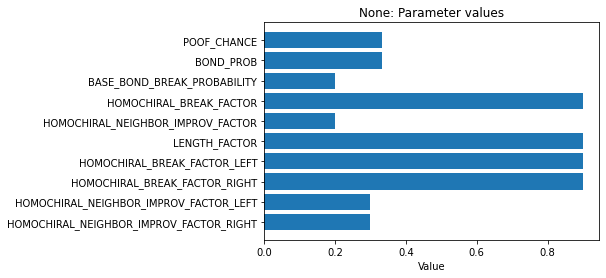

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

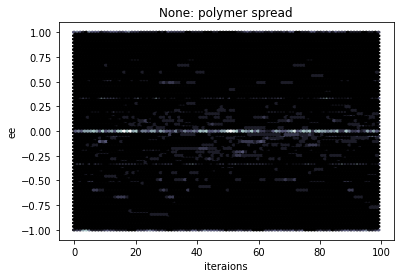

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

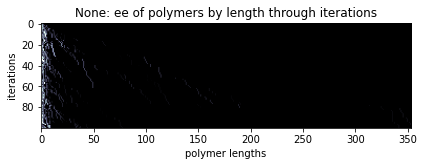

<IPython.core.display.Javascript object>

In [0]:
POOL_SIZE = 50
ITERATIONS = 100

a = Reactables(make_pool(POOL_SIZE))

for n in range(ITERATIONS):
  a.iterate(POOL_SIZE)


plots = ["parameters","polymer ee spread","ee heatmap"]
tb = widgets.TabBar(plots)

with tb.output_to("parameters"):
  a.visualize_parameters()

with tb.output_to("polymer ee spread"):
  a.plot_signed_ee_spread()

with tb.output_to("ee heatmap"):
  a.plot_ee_heatmap()





I'd like to be able to automate the process of trying out different parameters. Let's try to put something together to do that.

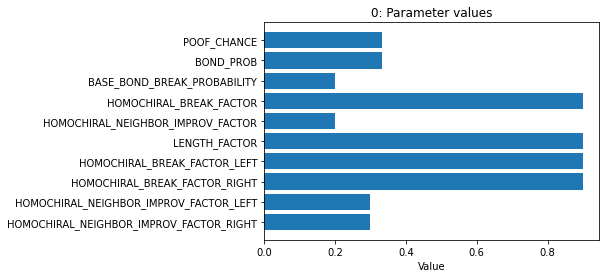

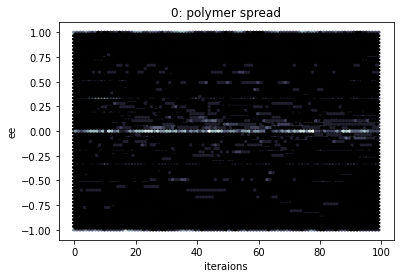

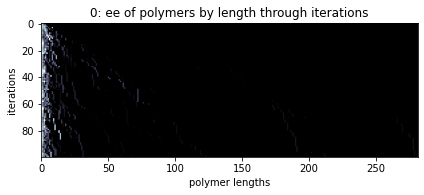

In [0]:
for poolsize in [100,1000,10000]:
  POOL_SIZE = poolsize
  for iterations in [10,100,1000,10000]:
    ITERATIONS = iterations
    for brk in range(11):
      BASE_BOND_BREAK_PROBABILITY = brk/10
      for hbrk in range(11):
        HOMOCHIRAL_BREAK_FACTOR = hbrk/10
        for improv in range(11):
          HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR = improv/10
          for leng in range(11):
            LENGTH_FACTOR = leng/10
            for poof in range(11):
              POOF_CHANCE = poof/10
              for bond in range(11):
                BOND_PROB = bond/10
                a = Reactables(make_pool(POOL_SIZE))

                for n in range(ITERATIONS):
                  a.iterate(POOL_SIZE)

                stamp = f"{POOL_SIZE}.{ITERATIONS}.{BASE_BOND_BREAK_PROBABILITY}.{HOMOCHIRAL_BREAK_FACTOR}.{HOMOCHIRAL_NEIGHBOR_IMPROV_FACTOR}.{LENGTH_FACTOR}.{POOF_CHANCE}.{BOND_PROB}"

                a.visualize_parameters(stamp=stamp)
                plt.savefig(f'{stamp}_params.jpg')
                a.plot_signed_ee_spread(stamp=stamp)
                plt.savefig(f'{stamp}_eespread.jpg')
                a.plot_ee_heatmap(stamp=stamp)
                plt.savefig(f'{stamp}_heatmap.jpg')